In [104]:
import pandas as pd
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error,mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [105]:

df=pd.read_csv('csv/ARIMAall.csv')
df['Time']=pd.to_datetime(df.Time,utc=True)
df.set_index('Time',inplace=True,drop=True)
df.index=df.index.tz_convert('Europe/Warsaw')
df.loc[df.index.hour==10,'ARIMATD']=pd.NA
df['ARIMATD']=df.ARIMATD.interpolate()


In [106]:
for column in df.columns.difference(['Load']):
    print('MAE {}:'.format(column),mean_absolute_error(df.Load,df[column]))
for column in df.columns.difference(['Load']):
    print('MSE {}:'.format(column),mean_squared_error(df.Load,df[column]))
for column in df.columns.difference(['Load']):
    print('MAPE {}:'.format(column),mean_absolute_percentage_error(df.Load,df[column]))

MAE ARIMALOAD: 3633.459686093819
MAE ARIMATD: 572.1166766942542
MAE ARIMATG: 1647.9894229955187
MAE PSEforecast: 588.265687235986
MSE ARIMALOAD: 17859869.61935678
MSE ARIMATD: 922357.6297565076
MSE ARIMATG: 4384284.056169156
MSE PSEforecast: 544895.7004626242
MAPE ARIMALOAD: 0.19377326680809248
MAPE ARIMATD: 0.030888458916734366
MAPE ARIMATG: 0.086891988001139
MAPE PSEforecast: 0.03091871806454108


In [107]:
df['AELoad']=np.abs(df.Load-df.ARIMALOAD)
df['AETD']=np.abs(df.Load-df.ARIMATD)
df['AETG']=np.abs(df.Load-df.ARIMATG)
df['AEPSEforecast']=np.abs(df.Load-df.PSEforecast)


In [120]:
df.AETD.nlargest(30)


Time
2024-01-08 08:00:00+01:00    10652.040257
2024-01-08 09:00:00+01:00    10253.444246
2024-01-08 07:00:00+01:00     9724.602568
2023-01-02 09:00:00+01:00     9121.652163
2023-01-02 08:00:00+01:00     9032.739609
2023-12-25 08:00:00+01:00     8897.413817
2023-12-25 09:00:00+01:00     8389.687743
2023-01-02 07:00:00+01:00     8171.552610
2023-12-25 07:00:00+01:00     8129.174015
2023-04-10 08:00:00+02:00     8096.066203
2022-04-18 08:00:00+02:00     7874.869641
2023-04-10 07:00:00+02:00     7865.844727
2024-01-02 08:00:00+01:00     7725.839547
2022-04-18 07:00:00+02:00     7692.107081
2023-04-17 08:00:00+02:00     7565.713591
2022-04-25 08:00:00+02:00     7506.195542
2024-01-02 09:00:00+01:00     7493.326852
2022-04-19 09:00:00+02:00     7370.015295
2024-01-08 06:00:00+01:00     7362.785054
2022-12-26 08:00:00+01:00     7308.818023
2022-12-26 07:00:00+01:00     7268.837530
2022-11-18 07:00:00+01:00     7256.569326
2023-11-01 09:00:00+01:00     7245.619090
2022-04-25 07:00:00+02:00    

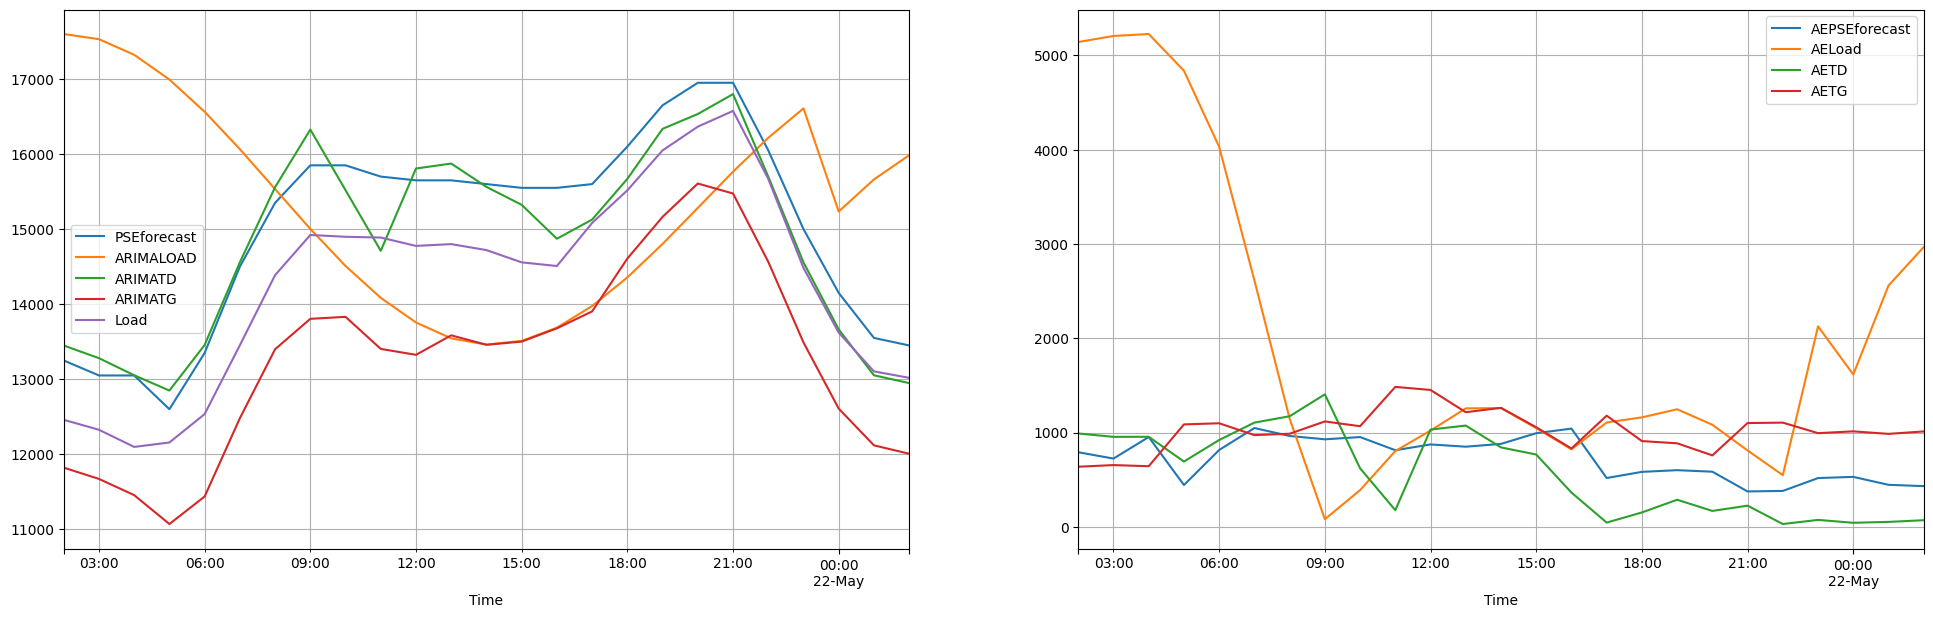

In [140]:
day=pd.to_datetime('2023-05-21',utc=True).tz_convert('Europe/Warsaw')
day1=pd.to_timedelta(1,'days')
fig,ax=plt.subplots(1,2,figsize=(24,7))
df.loc[day:day+day1,['PSEforecast','ARIMALOAD','ARIMATD',"ARIMATG",'Load',]].plot(ax=ax[0])
df.loc[day:day+day1,['AEPSEforecast','AELoad','AETD',"AETG"]].plot(ax=ax[1])
ax[1].grid(which='both')
ax[0].grid(which='both')